In [53]:


# arrays from numpy
import numpy as np
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression

import pandas as pd
import quandl
import math

df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume',]]
df['HL_PCT'] = (df['Adj. High']-df['Adj. Close'])/df['Adj. Close']*100.0
df['PCT_change'] = (df['Adj. Close']-df['Adj. Open'])/df['Adj. Open']*100.0
df = df[['HL_PCT','PCT_change','Adj. Close', 'Adj. Volume']]

forecast_col = 'Adj. Close'

# fill NaN with -99999
df.fillna(-99999, inplace=True)

forecast_out = int(math.ceil(0.01*len(df)))
print(0.01*len(df))

df['label'] = df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)
print(df.head())

X = np.array(df.drop(['label'],1))
Y = np.array(df['label'])

X = preprocessing.scale(X)

#X = X[:-forecast_out+1]
#df.dropna(inplace=True)
y = np.array(df['label'])

print(len(X),len(y))

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

clf = LinearRegression(n_jobs=-1)
#clf = svm.SVR()
#clf = svm.SVR(kernel='poly')
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)

print(accuracy)



31.57
              HL_PCT  PCT_change  Adj. Close  Adj. Volume      label
Date                                                                
2004-08-19  3.712563    0.324968   50.322842   44659000.0  69.399229
2004-08-20  0.710922    7.227007   54.322689   22834300.0  68.752232
2004-08-23  3.729433   -1.227880   54.869377   18256100.0  69.639972
2004-08-24  6.417469   -5.726357   52.597363   15247300.0  69.078238
2004-08-25  1.886792    1.183658   53.164113    9188600.0  67.839414
3125 3125
0.967661833644


In [54]:
# The coefficients
print('Coefficients: \n', clf.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((clf.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % clf.score(X_test, y_test))
#print(clf.predict(X_test))
print(X_train[0,:])

Coefficients: 
 [  -1.55365286   -0.44877994  193.14409518   -3.61011142]
Mean squared error: 1258.41
Variance score: 0.97
[-0.65811227  1.57892417 -0.81439824  1.42876058]


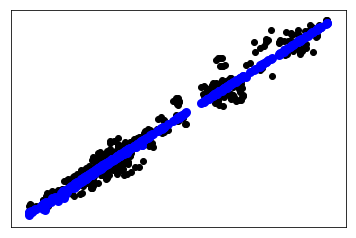

In [55]:
import matplotlib.pyplot as plt

# Plot outputs
col = 2
plt.scatter(X_test[:,col], y_test,  color='black')
plt.scatter(X_test[:,col], clf.predict(X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()